# Section 4.4 過小学習(underfitting)と過剰学習(overfitting)

- 基本的に，["Deep Learning with Python"](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438/)のSection 2.1(104-110ページ)を元にしている．  
- [原本のコード](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/4.4-overfitting-and-underfitting.ipynb)も入手可能であるが，それを解説を兼ねて多少改編している．  
- 恐らく，**Sect4.5と共にこの本を通じて最も重要な部分だと思われる．**  

- 過小学習(underfitting)と過剰学習(overfitting)をどう取り扱うのかを熟知するのは機械学習で重要なことである．  
- 機械学習は基本的に最適化(*optimization*)と一般化(*generalization*)の良い釣り合いと言える．
  + 最適化とは，モデルを訓練データを最もよく説明できるように合わせることを示す．  
  + 一般化とは，まだ遭遇していないデータも説明できる能力を示す.  
  + 良い一般化を達成することが最終目標であるが，この一般化を直接コントロールできないのが難点である．  

学習過程を通じてみれば，次のような流れになる:  

1. 学習の初期段階では，最適化と一般化両方が同時に働く．訓練データに対して学習を進め損失関数が減れば，テストデータについても同様に損失関数の減少が見られる．この段階は**過小学習**状態とも呼ばれる．ネットワークはまだ訓練データの全てのパターンのモデル化を達成していない．  
2. 反復数が増えるに連れ，一般化が段々効かなくなり，検証の尺度も段々横這いなる．  
3. その後，検証尺度が段々悪化されていく．つまり，モデルは**過剰学習**状態になっていく．この段階になると，訓練データに適応しすぎてしまい，新しく入ってくるデータに対応できなくなる．  

In [1]:
from keras.datasets import imdb
import numpy as np

# modify the default parameters of np.load
from pkg_resources import parse_version

## we need small modification to handle old-pickled data
np_pickle = parse_version(np.__version__) < parse_version('1.17.0')
if np_pickle:
    np_load_old = np.load
    np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

if np_pickle:
    np.load = np_load_old

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# x: vectorized training/test data
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

# y: vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

Using TensorFlow backend.


## 4.4.1 Reducing the network's size

- 過剰学習を防ぐ最も単純な方法は，モデルのサイズ(=学習可能パラメータ数)を減らすことである．  
- 一般的に，深層学習(deep learning)は訓練データの最適化に長けているが，本当のチャレンジは一般化である．例えば，MNIST訓練セットは500,000パラメータさえあれば辞書が作れるが，この辞書は新しく入ってきた入力データには何の役にも立たない．  

**[in progress...]**

モデルの大きさと一般化への影響を調べるために，単純な実験を見てみよう．  

- 基本構造: 16ノードのfully connected層で構成されたネットワーク  
- 比較対象: 4ノードのfully connected層で構成されたネットワーク  

In [2]:
from keras import models
from keras import layers

In [3]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

()

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4466 - acc: 0.8207 - val_loss: 0.3329 - val_acc: 0.8812
Epoch 2/20
 - 3s - loss: 0.2564 - acc: 0.9102 - val_loss: 0.3118 - val_acc: 0.8732
Epoch 3/20
 - 3s - loss: 0.1967 - acc: 0.9288 - val_loss: 0.2817 - val_acc: 0.8875
Epoch 4/20
 - 3s - loss: 0.1646 - acc: 0.9408 - val_loss: 0.3021 - val_acc: 0.8804
Epoch 5/20
 - 3s - loss: 0.1428 - acc: 0.9497 - val_loss: 0.3324 - val_acc: 0.8737
Epoch 6/20
 - 3s - loss: 0.1246 - acc: 0.9554 - val_loss: 0.3396 - val_acc: 0.8742
Epoch 7/20
 - 3s - loss: 0.1096 - acc: 0.9620 - val_loss: 0.3594 - val_acc: 0.8723
Epoch 8/20
 - 3s - loss: 0.0961 - acc: 0.9672 - val_loss: 0.3837 - val_acc: 0.8700
Epoch 9/20
 - 3s - loss: 0.0837 - acc: 0.9728 - val_loss: 0.4138 - val_acc: 0.8674
Epoch 10/20
 - 3s - loss: 0.0728 - acc: 0.9767 - val_loss: 0.4406 - val_acc: 0.8630
Epoch 11/20
 - 3s - loss: 0.0611 - acc: 0.9820 - val_loss: 0.5050 - val_acc: 0.8531
Epoch 12/20
 - 3s - loss: 0.0534 - 

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5957 - acc: 0.7747 - val_loss: 0.5055 - val_acc: 0.8464
Epoch 2/20
 - 3s - loss: 0.4195 - acc: 0.8809 - val_loss: 0.3894 - val_acc: 0.8748
Epoch 3/20
 - 3s - loss: 0.3145 - acc: 0.9040 - val_loss: 0.3246 - val_acc: 0.8844
Epoch 4/20
 - 3s - loss: 0.2531 - acc: 0.9164 - val_loss: 0.2967 - val_acc: 0.8855
Epoch 5/20
 - 3s - loss: 0.2157 - acc: 0.9271 - val_loss: 0.2816 - val_acc: 0.8900
Epoch 6/20
 - 3s - loss: 0.1898 - acc: 0.9359 - val_loss: 0.2808 - val_acc: 0.8880
Epoch 7/20
 - 4s - loss: 0.1700 - acc: 0.9430 - val_loss: 0.2816 - val_acc: 0.8876
Epoch 8/20
 - 4s - loss: 0.1538 - acc: 0.9489 - val_loss: 0.2872 - val_acc: 0.8876
Epoch 9/20
 - 4s - loss: 0.1409 - acc: 0.9527 - val_loss: 0.2958 - val_acc: 0.8850
Epoch 10/20
 - 4s - loss: 0.1297 - acc: 0.9561 - val_loss: 0.3067 - val_acc: 0.8814
Epoch 11/20
 - 4s - loss: 0.1198 - acc: 0.9598 - val_loss: 0.3188 - val_acc: 0.8796
Epoch 12/20
 - 4s - loss: 0.1112 - 

()

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

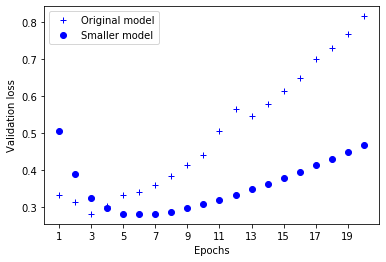

In [8]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss     , 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')

plt.xlabel('Epochs')
plt.xticks(epochs[::2])
plt.ylabel('Validation loss')

plt.legend()
plt.show()

()

In [9]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4760 - acc: 0.8104 - val_loss: 0.3218 - val_acc: 0.8616
Epoch 2/20
 - 4s - loss: 0.2241 - acc: 0.9120 - val_loss: 0.2756 - val_acc: 0.8874
Epoch 3/20
 - 4s - loss: 0.1223 - acc: 0.9556 - val_loss: 0.3555 - val_acc: 0.8778
Epoch 4/20
 - 4s - loss: 0.0834 - acc: 0.9740 - val_loss: 0.3683 - val_acc: 0.8826
Epoch 5/20
 - 4s - loss: 0.0547 - acc: 0.9869 - val_loss: 0.4380 - val_acc: 0.8823
Epoch 6/20
 - 4s - loss: 0.0027 - acc: 0.9998 - val_loss: 0.7295 - val_acc: 0.8796
Epoch 7/20
 - 4s - loss: 0.1090 - acc: 0.9894 - val_loss: 0.5630 - val_acc: 0.8800
Epoch 8/20
 - 4s - loss: 4.6305e-04 - acc: 1.0000 - val_loss: 0.7946 - val_acc: 0.8796
Epoch 9/20
 - 4s - loss: 5.7176e-05 - acc: 1.0000 - val_loss: 0.9859 - val_acc: 0.8806
Epoch 10/20
 - 4s - loss: 0.1157 - acc: 0.9932 - val_loss: 3.0263 - val_acc: 0.7868
Epoch 11/20
 - 4s - loss: 0.0144 - acc: 0.9978 - val_loss: 1.0262 - val_acc: 0.8608
Epoch 12/20
 - 4s - loss: 2

()

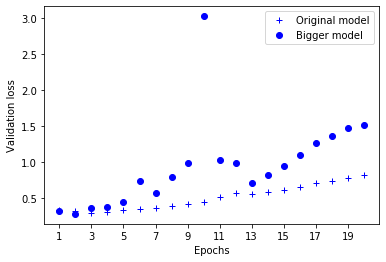

In [11]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss    , 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')

plt.xlabel('Epochs')
plt.xticks(epochs[::2])
plt.ylabel('Validation loss')

plt.legend()
plt.show()

()

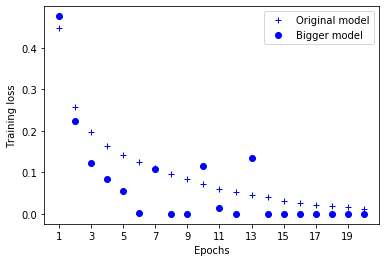

In [12]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss    , 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')

plt.xlabel('Epochs')
plt.xticks(epochs[::2])
plt.ylabel('Training loss')

plt.legend()
plt.show()

()

## 4.4.2 Adding weight regularization

In [13]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

()

In [15]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 142us/step - loss: 0.4855 - acc: 0.8241 - val_loss: 0.3798 - val_acc: 0.8764
Epoch 2/20
25000/25000 [==============================] - 3s 138us/step - loss: 0.3149 - acc: 0.9055 - val_loss: 0.3364 - val_acc: 0.8863
Epoch 3/20
25000/25000 [==============================] - 3s 138us/step - loss: 0.2712 - acc: 0.9184 - val_loss: 0.3566 - val_acc: 0.8758
Epoch 4/20
25000/25000 [==============================] - 3s 138us/step - loss: 0.2484 - acc: 0.9291 - val_loss: 0.3313 - val_acc: 0.8871
Epoch 5/20
25000/25000 [==============================] - 3s 139us/step - loss: 0.2372 - acc: 0.9331 - val_loss: 0.3490 - val_acc: 0.8815
Epoch 6/20
25000/25000 [==============================] - 3s 139us/step - loss: 0.2264 - acc: 0.9386 - val_loss: 0.3664 - val_acc: 0.8756
Epoch 7/20
25000/25000 [==============================] - 4s 140us/step - loss: 0.2221 - acc: 0.9392 - val_loss: 0.3543 - 

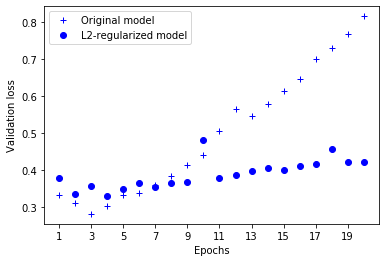

In [16]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')

plt.xlabel('Epochs')
plt.xticks(epochs[::2])
plt.ylabel('Validation loss')

plt.legend()
plt.show()

()

## 4.4.3 Adding dropout

In [17]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [18]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5925 - acc: 0.6868 - val_loss: 0.4571 - val_acc: 0.8481
Epoch 2/20
 - 3s - loss: 0.4522 - acc: 0.8156 - val_loss: 0.3625 - val_acc: 0.8758
Epoch 3/20
 - 3s - loss: 0.3714 - acc: 0.8709 - val_loss: 0.3162 - val_acc: 0.8873
Epoch 4/20
 - 3s - loss: 0.3250 - acc: 0.8944 - val_loss: 0.2945 - val_acc: 0.8911
Epoch 5/20
 - 3s - loss: 0.2845 - acc: 0.9102 - val_loss: 0.2861 - val_acc: 0.8867
Epoch 6/20
 - 3s - loss: 0.2497 - acc: 0.9220 - val_loss: 0.2990 - val_acc: 0.8876
Epoch 7/20
 - 3s - loss: 0.2274 - acc: 0.9284 - val_loss: 0.3305 - val_acc: 0.8842
Epoch 8/20
 - 3s - loss: 0.2104 - acc: 0.9326 - val_loss: 0.3098 - val_acc: 0.8806
Epoch 9/20
 - 3s - loss: 0.1937 - acc: 0.9388 - val_loss: 0.3683 - val_acc: 0.8808
Epoch 10/20
 - 3s - loss: 0.1780 - acc: 0.9457 - val_loss: 0.3729 - val_acc: 0.8811
Epoch 11/20
 - 3s - loss: 0.1684 - acc: 0.9474 - val_loss: 0.3772 - val_acc: 0.8727
Epoch 12/20
 - 3s - loss: 0.1570 - 

ドロップアウトを入れた結果は次のようになる:

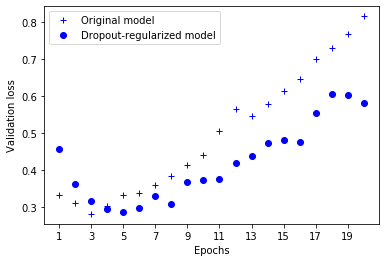

In [19]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss , 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')

plt.xlabel('Epochs')
plt.xticks(epochs[::2])
plt.ylabel('Validation loss')

plt.legend()
plt.show()

(end)